# 关于本书

## 数据挖掘十大算法

数据以及基于数据做出决策是非常重要的，本书内容来源于数据——“数据挖掘十大算法” 是IEEE数据挖掘国际会议（ICDM）上的一篇论文

[^Xindong Wu等，“Top 10 Algorithms in Data Mining”, Journal of Knowledge and Information Systems 14, no. 1（December 2007）。]: 

，2007年12月在Journal of Knowledge and information System  杂志上发表。依据知识发现和数据挖掘国际会议（KDD）获奖者的问卷调查结果，论文统计出排名前十的数据挖掘算法。本书的基本框架与论文中提到的算法一致。

论文选出的机器学习算法包括：C4.5决策树 K-均值（K-mean)、支持向量机（SVM）、Apriori、最大期望算法（EM）、PageRank算法、AdaBoost 算法、K-近邻算法（KNN）、朴素贝叶斯算法（NB）和分类回归树（CART）算法。本书包含了其中的8个算法。本书没有包括PageRank算法是因为搜索引擎巨头Google引入的PageRank算法已经在很多著作里得到了充分的论述。



## 第一部分 分类

本书没有按照“数据挖掘十大算法“的次序来介绍机器学习算法。第一部分是首先介绍了机器学习的基本基础知识，然后讨论如何使用机器学习算法进行分类。第2章介绍了基本的机器学习算法：k-近邻算法；第3章是本书第一次讲述决策树；第4章讨论如何使用概率分布算法进行分类及朴素贝叶斯算法；第5章介绍的Logistic回归算法虽然不在排名前10的列表当中，但是引入了优化算法的主题，也是非常重要的，这一张最后还讨论了强大而流行的支持向量机；第7章讨论AdaBoost集成方法，它也是本书讨论分类机器学习算法的最后一章，这一章还讨论了训练样本非均匀分布时所引发的非均衡分类问题。



## 第二部分 利用回归预测数值型数据

第二部分包含两章讨论连续型数值的回归预测问题。第8章主要讨论了回归、去噪、和局部加权线性回归，此外还讨论了机器学习算法必须考虑的偏差方差折中问题。第9章桃林了基于树的回归算法和分类回归树（CART）算法。



### 第三部分 无监督学习

前两部分讨论的监督学习需要用户知道目标值，简单滴说就是知道在数据中寻找什么。而第三部分开始讨论的无监督学习则无需用户知道搜寻的目标。只需要从算法程序中的到这些数据的共同特征。第10章讨论的无监督学习算法时K-均值聚类算法；第11章研究用于关联分析的Apriori算法；第12章讨论如何使用FP-Growth算法改进关联分析。



### 第四部分 其他工具

本书的的第四部分介绍机器学习算的使用到的附属工具。第13章和第14章引入的两个数学运算工具用于消除数据噪声，分别是主成分分析和奇异值分解。一旦机器血丝算法处理的数据扩张到无法在一台计算机上完全处理时，就必须引入分布式计算的概念，本书最后一章将介绍MapReduce架构。



示例

本书的许多示例演示了如何在现实世界中使用机器学习算法，通常我们按照下面的步骤保证算法应用的正确性：

（1）确保算法可以正确处理简单的数据

（2）将现实世界中的到的数据格式化为算法可以处理的格式；

（3）将步骤2的到的数据输入到步骤1的算法中，检验算法的运行结果。

千万不要忽略前两个步骤而直接跳到步骤3来检验算法处理真实数据的效果。任何复杂系统都是由基础工程构成的，尤其是算法出现问题时，增量地搭建系统可以确保我们及时找到问题出现的位置和原因。如果刚开始就把这些堆砌在一起，我们就很难发现到底是不准确的算的实现引发的问题还是数据格式的问题。此外，本书在实现算法的过程中，记录了很多注意事项，将有助于读者深入了解机器学习算法。





# 第一部分 分类

## 第1章 机器学习基础

本书前两部分主要讨论监督学习（supervised learning）。在监督学习过程中，我们只需要给定输入样本集，机器就可以从中推演出指定目标变量的可能结果。

监督学习一般使用两种类型的目标变量：标称型和数值型。标称型目标变量的结果只在有限目标集中取值，如真假、动物分类的集合{爬行类、鱼类、哺乳类、两栖类}；数值型目标变量则可从无限的数值集合中取值，如0.100、42.001、1000743等。

数值型目标变量主要用于回归分析，在本书的第二部分研究，第一部分主要介绍分类。



### 1.1 何谓机器学习

### 1.2 关键术语

通过构建下面的鸟类分类系统，我们将接触机器学习涉及的常用术语。

表1-1是我们勇于区分不同鸟类需要使用的四个不同属性值，我们选用体重、翼展、有无脚蹼以及后背的颜色作为评测基准。现实中你可能想测量更多的值。通常的做法是测量所有可测属性，而后再挑选出重要部分。虾米测量的这四种值称之为“特征”，也可以称作属性，但本书一律将其称之为特征。表1-1中的每一行都收一个具有相关一特征的实例。

表1-1 基于四种特征的鸟物种分类表


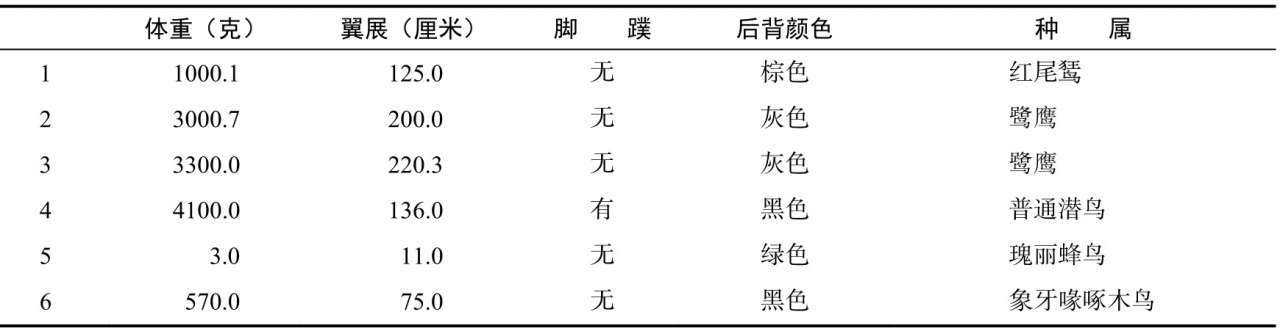



表1-1 的前两种特征是数值型，可以使用十进制数字；第三种特征（是否有脚蹼）是二值型，只可取0或1；第四种特征（后背颜色）是基于自定义调色板的枚举类型，这里仅选择一些常用色彩。如果仅仅利用常见的7色作为评测特征，后背颜色也可以是一个整数。当然在7色之中选择一个座位后背颜色有些太简单了。但作为专家系统的演示用例，这已经足够了。



**机器学习的主要任务是分类。**本节我们讲述如何使用表1-1进行分类。大家都想从众多其它鸟类中分辨出象牙喙（**[huì]**）啄木鸟。简单的做法是安装一个喂食器，然后雇佣一位鸟类学着，观察在附近捕食的鸟类。这种方法太昂贵而且专家只能在同一时间出现在同一个地方。我们可以制动画处理上述过程。安装多个带有照相机的喂食器，同时接入计算机用于标识前来进食的鸟。同样我们可以在喂食器中放置称重仪器以获取鸟的体重，利用计算机视觉技术来提取鸟的翅长、脚的类型和后背色彩。假定我们可以得到所需的全部特征信息，那该如何判断飞入进食器的鸟是不是象牙喙啄木鸟呢？这个任务就是分类，有很多机器学习算法方法非常善于分类。本例中 的类别就是鸟的物种，更具体的说，就是区分是否为象牙喙啄木鸟。





最终我们决定使用某个机器学习算法进行分类，首先需要做的是算法训练，即学习如何分类。通常我们需要先做的是算法训练，即学习如何分类。通常我们为算法输入大量已经分类的数据作为算的的训练集。训练集实用与训练机器学习算法的数据样本集合。表1-1是包含六个训练样本的训练集。每个训练样本有4种特征、一个目标变量，如1-2所示。


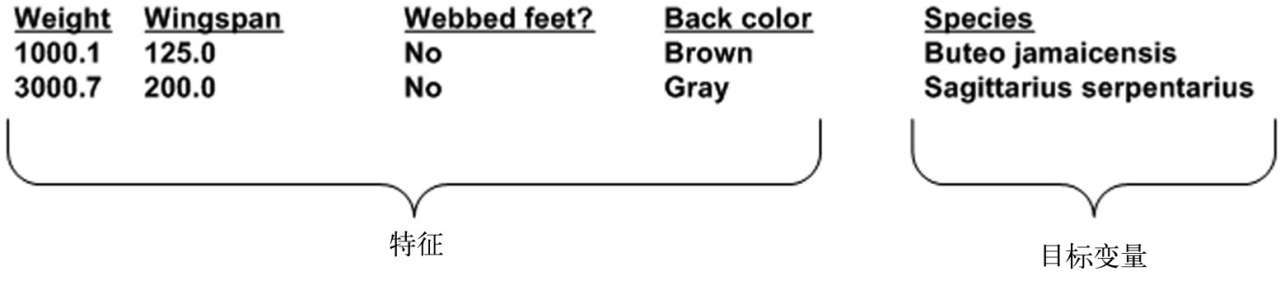





​																			图1-2 特征和标识的目标变量

注意：特征或者属性通常是训练样本集的列，它们是独立测量得到的结果，多个特征联系在一起共同组成一个训练样本。



为了测试机器学习的算法效果，通常使用两套独立的样本集：训练数据和测试数据。当机器学习程序开始运行时，使用训练样本集作为算法的输入，训练完成之后输入测试样本。输入测试样本时并不提哦那个测试样本的目标变量，由程序决定样本属于哪个类别/比较测试样本预测的目标变量值与实际样本类别之间的差别，就可以得出算法的实际精确度。

本书的后续章节将会引入更好地使用测试样本和训练样本信息的方法，这里就不再详述。

假定这个鸟类分类程序，经过测试满足精确度要求，是否我们就可以看到机器已经学会了如何区分不同的鸟类了呢？这部分工作称之为知识表示，某些算法可以产生很容易理解的知识表示，而某些算法的知识表示也许只能为计算机所理解。知识别哦知识可以采用规则集的形式，也可以采用概率分布的形式，甚至可以是训练样本集的一个专家系统，而仅仅对机器学习算法获取的信息感兴趣。此时，采用何种方式表示知识就显得非常重要了。

本节介绍了机器学习领域涉及的关键术语，后续章节将会在必要时引入其他的术语，这里就不再进一步说明。下一节将会介绍机器学习算法的主要任务。



### 1.3 机器学习的主要任务

本节主要介绍机器学习的主要任务，并给出一个表格，帮助读者将机器学习算法转化为可实际运作的应用程序。

上街的例子介绍了机器学习如何解决分类问题，它的主要任务是将实例数据划分到合适的分类中。机器学习的另一项任务是回归的例子——数据拟合曲线：通过给定的数据点的最优拟合曲线。分类和回归属于监督学习，之所以被称之为监督学习，是因为这类实验服必须知道预测什么，即目标变量的分类信息。

与监督学习相对应的是无监督学习，此时数据没有类别信息，也不会给定目标值。再无监督学习中，将数据集合分成由类似的对象组成的多个类的过程被称之为“聚类”；将寻找描述数据统计值的过程称之为密度估计。此外，无监督学习还可以减少数据特征的维度，以便我们可以使用二维或者三维图形更加直观地展示数据信息。表1-2列出了机器学习的主要任务，以及解决相应问题的算法。






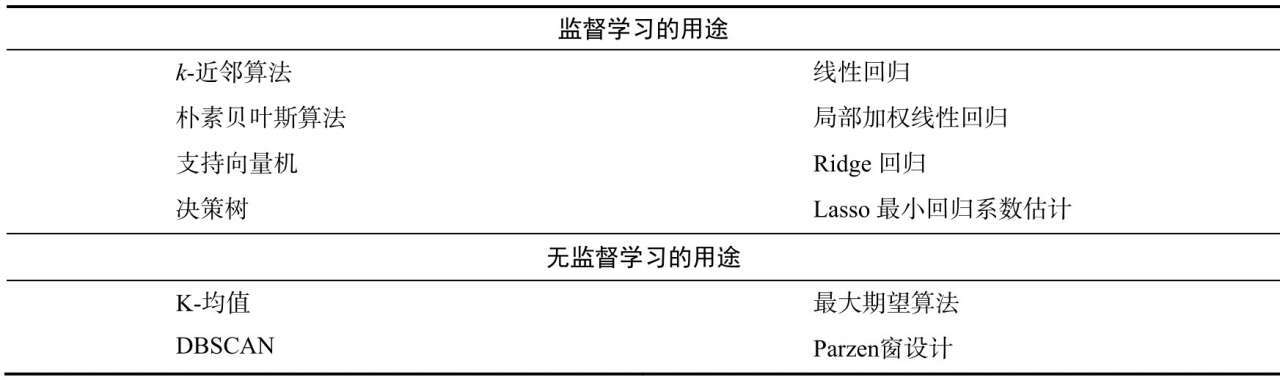
表1-2 用于执行分类、回归、聚类和密度估计的机器学习算法



你可以不已经注意到了表1-2中的很多算法都可以用于解决同样的问题，有人会问：“为什么解决同一个问题会有四种方法？精通其中一种算法，是否可以处理所有的问题？”本书的下一章节将回答这些疑问。



### 1.4 如何选择合适的算法

从表1-2中所列的算法中选择实际可用的算法，必须考虑下面两个问题：一、使用机器学习算法的目的，想要算法完成何种任务，比如是预测明天下雨的概率还是对投票者按兴趣分组：二、需要分析或者收集的数据是什么。



首先要考虑使用机器学习算法的目的。如果想要预测目标变量的值，可以用监督学习算法，否则可以选择无监督学习算法。确定选择监督学习算法之后，需要进一步确定目标变量类型。如果目标变量是离散型，如是/否、1/2/3、A/B/C或者红/黄/黑等，则可以选择分类算法；如果目标变量是连续型的数值，如0.0～100.00、-999～999或者是+∞～-∞等都需要选择回归算法。



如果不想预测目标变量的值，则可以选择无监督学习算法。进一步释放需要将数据划分为离散的组。如果这是唯一的需求则使用聚类算法；如果还需要估计数据与每个分组的相似程度，则需要使用密度估计算法。



在大多数情况下，上面给出的选择方法都能帮助读者选择恰当的机器学习方法，但这也并非一成不变。第9章我们就会使用分类算法来处理回归问题。陷入这雨上面的监督学习中处理问题的规则不同。



1.5 开发机器学习应用程序的步骤

（1）收集数据

（2）准备数据

（3）分析输入数据

（4）训练算法

（5）测试算法

（6）使用算法


## 第2章 K-近邻算法

本章内容

- K-近邻算法
- 从文本文件中解析和导入数据
- 使用matplotlib创建扩散图
- 归一化数值





### 2.1 K-近邻算法概述

简单地说，k-近邻算法采用测量不同特征值之间的距离方法进行分类。

K-近邻算法

优点：精度高，对于异常值不敏感，无数据输入假定。

缺点：计算复杂度高，空间复杂度高。

适用数据范围：数值型和标称型。



本书讲解的第一个机器学习算法是K-近邻算法（knn），它的工作原理是：


存在一个样本数据集合，也称作训练样本集，并且样本集中每个数据都存在标签，即我们知道样本集中每一数据与所属分类的对应关系。输入没有标签的新数据后，将新数据的每个特征与样本集中数据对应的特征进行比较，然后算法提取样本集中特征最相似数据（最近邻）的分类标签。一般来说，我们只选择样本数据集中前k个最相似的数据，这就是k-近邻算法中k的出处，通常k是不大于20的整数。最后，选择k个最相似数据中出现次数最多的分类，作为新数据的分类。
我们回到前面电影分类的例子，使用k-近邻算法分类爱情片和动作片。有人曾经统计过很多电影的打斗镜头和接吻镜头，图2-1显示了6部电影的打斗和接吻镜头数。假如有一部未看过的电影，如何确定它是爱情片还是动作片呢？我们可以使用kNN来解决这个问题。

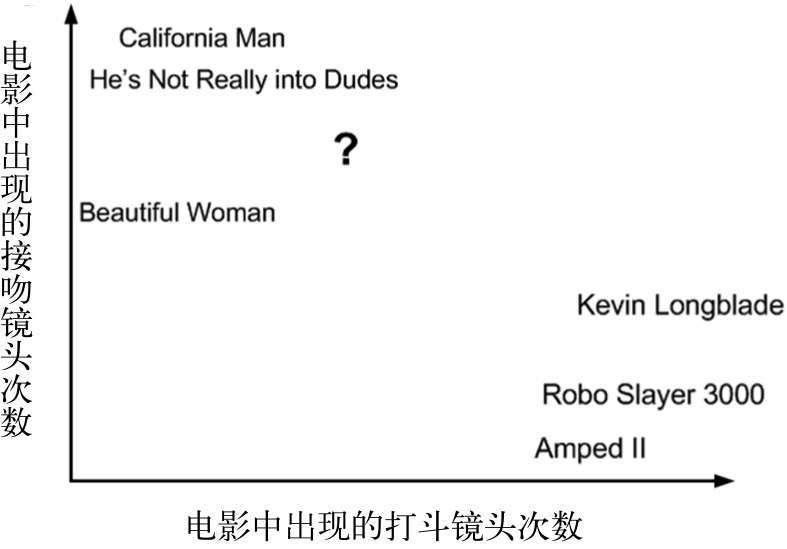
图2-1 使用打斗和接吻镜头分数分类电影

首先我们需要知道这个未知电影存在多少个打斗镜头和接吻镜头，图2-1中问号位置是该未知电影出现的镜头数图形化展示，具体数字参见表2-1。






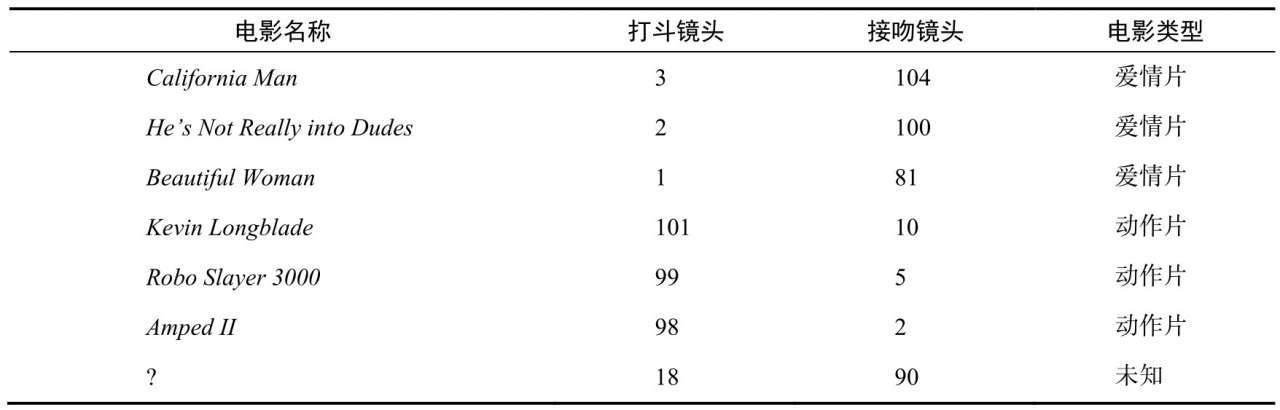







现在我们得到了样本集中所有电影与未知电影的距离，按照距离递增排序，可以找到k个距离最近的电影。假定k=3，则三个最靠近的电影依次是He's Not Really into Dudes、Beautiful Woman和California Man。k-近邻算法按照距离最近的三部电影的类型，决定未知电影的类型，而这三部电影全是爱情片，因此我们判定未知电影是爱情片。
本章主要讲解如何在实际环境中应用k-近邻算法，同时涉及如何使用Python工具和相关的机器学习术语。按照1.5节开发机器学习应用的通用步骤，我们使用Python语言开发k-近邻算法的简单应用，以检验算法使用的正确性。



k-近邻算法的一般流程
（1）收集数据：可以使用任何方法。
（2）准备数据：距离计算所需要的数值，最好是结构化的数据格式。
（3）分析数据：可以使用任何方法。
（4）训练算法：此步骤不适用于k-近邻算法。
（5）测试算法：计算错误率。
（6）使用算法：首先需要输入样本数据和结构化的输出结果，然后运行k-近邻算法判定输入数据分别属于哪个分类，最后应用对计算出的分类执行后续的处理。

In [28]:
### 2.3 示例：手写识别系统



示例：使用K-近邻算法的手写识别系统

（1）收集数据：提供文本文件

（2）准备数据：编写函数img2vector(), 将图像格式转换为分类器使用的向量格式

（3）分析数据：在python命令提示符中检查数据，确保它符合要求。

（4）训练算法：此不走不适用于K-近邻算法

（5）测试算法：编写函数使用提供的部分数据集作为测试样本，测试样本与非测试样本的区别在于测试样本是已经完成分类的数据，如果预测分类与实际类别不同，则标记为一个错误。

（6）使用算法：本例没有完成此步骤，若你感兴趣可以构建完整的应用程序，从图像中提取数字，并完成数字识别，美国的邮件分拣系统就是一个实际运行的类似系统。

SyntaxError: invalid character in identifier (<ipython-input-28-bd5b8a38160a>, line 5)

2.1.1 准备：使用Python导入数据

In [29]:
from numpy import *
import operator


def createDataSet():
    group = array([[1.0, 1.1], [1.0, 1.0],[0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group,labels
    

In [30]:
createDataSet()

(array([[1. , 1.1],
        [1. , 1. ],
        [0. , 0. ],
        [0. , 0.1]]),
 ['A', 'A', 'B', 'B'])

In [31]:
group = array([[1.0, 1.1], [1.0, 1.0],[0, 0], [0, 0.1]])

In [32]:
labels = ['A', 'A', 'B', 'B']

在上面的代码中，我们导入了两个模块：第一个是科学计算包NumPy；第二个是运算符模块，k-近邻算法执行排序操作时将使用这个模块提供的函数，后面我们将进一步介绍。 为了方便使用createDataSet()函数，它创建数据集和标签.

In [33]:
group,labels = createDataSet() 


上述命令创建了变量group和labels，在Python命令提示符下，输入变量的名字以检验是否正确地定义变量

In [34]:
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]])

In [35]:
labels

['A', 'A', 'B', 'B']

这里有4组数据，每组数据有两个我们已知的属性或者特征值。上面的group矩阵每行包含一个不同的数据，我们可以把它想象为某个日志文件中不同的测量点或者入口。由于人类大脑的限制，我们通常只能可视化处理三维以下的事务。因此为了简单地实现数据可视化，对于每个数据点我们通常只使用两个特征。

向量labels包含了每个数据点的标签信息，labels包含的元素个数等于group矩阵行数。这里我们将数据点（1, 1.1）定义为类A，数据点（0, 0.1）定义为类B。为了说明方便，例子中的数值是任意选择的，并没有给出轴标签，图2-2是带有类标签信息的四个数据点。

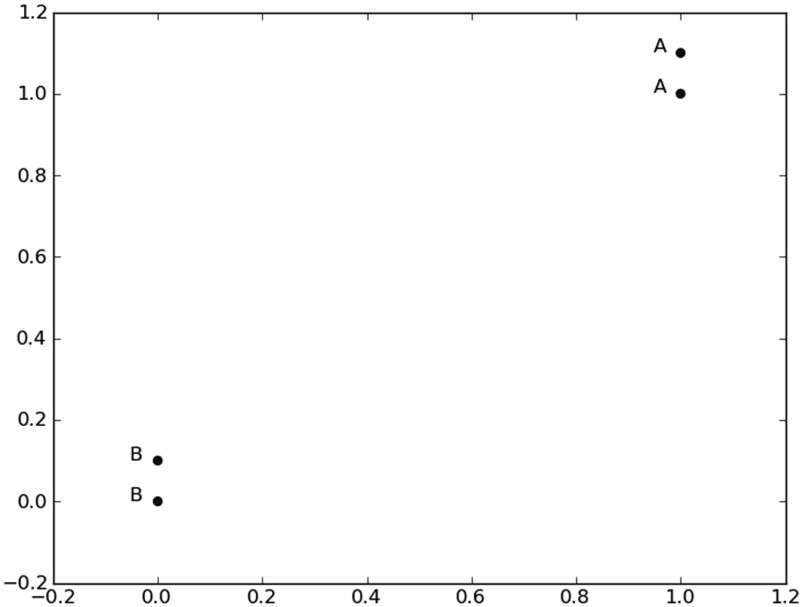

现在我们已经知道Python如何解析数据，如何加载数据，以及kNN算法的工作原理，接下来我们将使用这些方法完成分类任务。

#### 2.1.2 实施kNN算法

本节使用程序清单2-1的函数运行kNN算法，为每组数据分类。这里首先给出k-近邻算法的伪代码和实际的Python代码，然后详细地解释每行代码的含义。该函数的功能是使用k-近邻算法将每组数据划分到某个类中，其伪代码如下：
对未知类别属性的数据集中的每个点依次执行以下操作：
（1）计算已知类别数据集中的点与当前点之间的距离；
（2）按照距离递增次序排序；
（3）选取与当前点距离最小的k个点；
（4）确定前k个点所在类别的出现频率；
（5）返回前k个点出现频率最高的类别作为当前点的预测分类。
Python函数classify0()如程序清单2-1所示。

$$程序清单2-1 K近邻算法$$

In [36]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()
    classCount ={}
    
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0)+1
    
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    
    return sortedClassCount[0][0]

lassify0()函数有4个输入参数：用于分类的输入向量是inX，输入的训练样本集为dataSet，标签向量为labels，最后的参数k表示用于选择最近邻居的数目，其中标签向量的元素数目和矩阵dataSet的行数相同。程序清单2-1使用欧氏距离公式，计算两个向量点xA和xB之间的距离1：

$d = \sqrt{(xA_0)^2+(xA_1-xB_1)^2}$￼

例如，点（0, 0）与（1, 2）之间的距离计算为：

$d = \sqrt{(1-0)^2+(2-0)^2}$

￼
如果数据集存在4个特征值，则点（1, 0, 0, 1）与（7, 6, 9, 4）之间的距离计算为：
￼

$\sqrt{(7-1)^2+(6-0)^2+(9-0)^2+(4-1)^2}$



计算完所有点之间的距离后，可以对数据按照从小到大的次序排序。然后，确定前k个距离最小元素所在的主要分类2，输入k总是正整数；最后，将classCount字典分解为元组列表，然后使用程序第二行导入运算符模块的itemgetter方法，按照第二个元素的次序对元组进行排序。此处的排序为逆序，即按照从最大到最小次序排序3，最后返回发生频率最高的元素标签。
为了预测数据所在分类，在Python提示符中输入下列命令：

In [37]:
classify0([0,0],group,labels,3)

'B'

输出结果应该是B，大家也可以改变输入[0, 0]为其他值，测试程序的运行结果。
到现在为止，我们已经构造了第一个分类器，使用这个分类器可以完成很多分类任务。从这个实例出发，构造使用分类算法将会更加容易。

#### 2.1.3 如何测试分类器

上文我们已经使用k-近邻算法构造了第一个分类器，也可以检验分类器给出的答案是否符合我们的预期。读者可能会问：“分类器何种情况下会出错？”或者“答案是否总是正确的？”答案是否定的，分类器并不会得到百分百正确的结果，我们可以使用多种方法检测分类器的正确率。此外分类器的性能也会受到多种因素的影响，如分类器设置和数据集等。不同的算法在不同数据集上的表现可能完全不同，这也是本部分的6章都在讨论分类算法的原因所在。

为了测试分类器的效果，我们可以使用已知答案的数据，当然答案不能告诉分类器，检验分类器给出的结果是否符合预期结果。通过大量的测试数据，我们可以得到分类器的错误率——分类器给出错误结果的次数除以测试执行的总数。错误率是常用的评估方法，主要用于评估分类器在某个数据集上的执行效果。完美分类器的错误率为0，最差分类器的错误率是1.0，在这种情况下，分类器根本就无法找到一个正确答案。读者可以在后面章节看到实际的数据例子。

上一节介绍的例子已经可以正常运转了，但是并没有太大的实际用处，本章的后两节将在现实世界中使用k-近邻算法。首先，我们将使用k-近邻算法改进约会网站的效果，然后使用k-近邻算法改进手写识别系统。本书将使用手写识别系统的测试程序检测k-近邻算法的效果

### 2.2 示例：使用k-近邻算法改进约会网站的配对效果

我的朋友海伦一直使用在线约会网站寻找适合自己的约会对象。尽管约会网站会推荐不同的人选，但她并不是喜欢每一个人。经过一番总结，她发现曾交往过三种类型的人：
❏ 不喜欢的人
❏ 魅力一般的人
❏ 极具魅力的人
尽管发现了上述规律，但海伦依然无法将约会网站推荐的匹配对象归入恰当的分类。她觉得可以在周一到周五约会那些魅力一般的人，而周末则更喜欢与那些极具魅力的人为伴。海伦希望我们的分类软件可以更好地帮助她将匹配对象划分到确切的分类中。此外海伦还收集了一些约会网站未曾记录的数据信息，她认为这些数据更有助于匹配对象的归类。
示例：在约会网站上使用k-近邻算法
（1）收集数据：提供文本文件。
（2）准备数据：使用Python解析文本文件。
（3）分析数据：使用Matplotlib画二维扩散图。
（4）训练算法：此步骤不适用于k-近邻算法。
（5）测试算法：使用海伦提供的部分数据作为测试样本。测试样本和非测试样本的区别在于：测试样本是已经完成分类的数据，如果预测分类与实际类别不同，则标记为一个错误。
（6）使用算法：产生简单的命令行程序，然后海伦可以输入一些特征数据以判断对方是否为自己喜欢的类型。

#### 2.2.1 准备数据：从文本文件中解析数据

海伦收集约会数据已经有了一段时间，她把这些数据存放在文本文件datingTestSet2.txt中，每个样本数据占据一行，总共有1000行。海伦的样本主要包含以下3种特征：
❏ 每年获得的飞行常客里程数
❏ 玩视频游戏所耗时间百分比
❏ 每周消费的冰淇淋公升数

在将上述特征数据输入到分类器之前，必须将待处理数据的格式改变为分类器可以接受的格式。在kNN.py中创建名为file2matrix的函数，以此来处理输入格式问题。该函数的输入为文件名字符串，输出为训练样本矩阵和类标签向量。



$$ 程序清单2-2 将文本记录转换为NumPy的解析程序 $$



In [38]:
def file2matrix(filename):
    fr = open(filename)
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)
    returnMat = zeros((numberOfLines,3))
    classLabelVector = []
    index = 0
    for line  in arrayOLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat, classLabelVector

    

    上面的代码可以看到，Python处理文本文件非常容易。首先我们需要知道文本文件包含多少行。打开文件，得到文件的行数1。然后创建以零填充的矩阵NumPy2（实际上，NumPy是一个二维数组，这里暂时不用考虑其用途）。为了简化处理，我们将该矩阵的另一维度设置为固定值3，你可以按照自己的实际需求增加相应的代码以适应变化的输入值。循环处理文件中的每行数据3，首先使用函数line.strip()截取掉所有的回车字符，然后使用tab字符\t将上一步得到的整行数据分割成一个元素列表。接着，我们选取前3个元素，将它们存储到特征矩阵中。Python语言可以使用索引值-1表示列表中的最后一列元素，利用这种负索引，我们可以很方便地将列表的最后一列存储到向量classLabelVector中。需要注意的是，我们必须明确地通知解释器，告诉它列表中存储的元素值为整型，否则Python语言会将这些元素当作字符串处理。以前我们必须自己处理这些变量值类型问题，现在这些细节问题完全可以交给NumPy函数库来处理。

In [39]:
file2matrix('datingTestSet2.txt')

(array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
        [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
        [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
        ...,
        [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
        [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
        [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]]),
 [3,
  2,
  1,
  1,
  1,
  1,
  3,
  3,
  1,
  3,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  2,
  3,
  2,
  1,
  2,
  3,
  2,
  3,
  2,
  3,
  2,
  1,
  3,
  1,
  3,
  1,
  2,
  1,
  1,
  2,
  3,
  3,
  1,
  2,
  3,
  3,
  3,
  1,
  1,
  1,
  1,
  2,
  2,
  1,
  3,
  2,
  2,
  2,
  2,
  3,
  1,
  2,
  1,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  3,
  1,
  2,
  3,
  2,
  2,
  1,
  3,
  1,
  1,
  3,
  3,
  1,
  2,
  3,
  1,
  3,
  1,
  2,
  2,
  1,
  1,
  3,
  3,
  1,
  2,
  1,
  3,
  3,
  2,
  1,
  1,
  3,
  1,
  2,
  3,
  3,
  2,
  3,
  3,
  1,
  2,
  3,
  2,
  1,
  3,
  1,
  2,
  1,
  1,
  2,
  3,
  2,
  3,
  2,
  3,
  2,
  1,
  3,
  3,
  3,
  1,
  3,


In [40]:
datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')

In [41]:
datingDataMat

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [42]:
datingLabels[0:20]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

现在已经从文本文件中导入了数据，并将其格式化为想要的格式，接着我们需要了解数据的真实含义。当然我们可以直接浏览文本文件，但是这种方法非常不友好，一般来说，我们会采用图形化的方式直观地展示数据。下面就用Python工具来图形化展示数据内容，以便辨识出一些数据模式。

**NumPy数组和Python数组**
本书将大量使用NumPy数组，你既可以直接在Python命令行环境中输入from numpy import array将其导入，也可以通过直接导入所有NumPy库内容来将其导入。由于NumPy库提供的数组操作并不支持Python自带的数组类型，因此在编写代码时要注意不要使用错误的数组类型。

#### 2.2.2 分析数据：使用Matplotlib创建散

首先我们使用Matplotlib制作原始数据的散点图，在Python命令行环境中，输入下列命令：

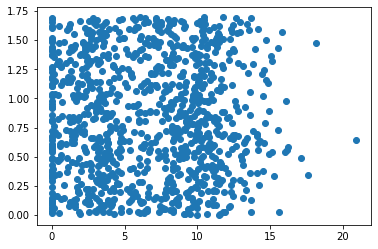

In [43]:

import matplotlib
import matplotlib.pyplot as plt
from numpy import array

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1],datingDataMat[:,2])
plt.show()

输出效果如上图所示。散点图使用datingDataMat矩阵的第二、第三列数据，分别表示特征值“玩视频游戏所耗时间百分比”和“每周所消费的冰淇淋公升数”。

由于没有使用样本分类的特征值，我们很难从图2-3中看到任何有用的数据模式信息。一般来说，我们会采用色彩或其他的记号来标记不同样本分类，以便更好地理解数据信息。Matplotlib库提供的scatter函数支持个性化标记散点图上的点。重新输入上面的代码，调用scatter函数时使用下列参数：

<function matplotlib.pyplot.show(close=None, block=None)>

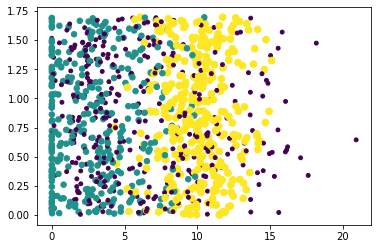

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1],datingDataMat[:,2], 15.0*array(datingLabels), 15.0*array(datingLabels))
plt.show

图2-4 带有样本分类标签的约会数据散点图。虽然能够比较容易地区分数据点从属类别，但依然很难根据这张图得出结论性信息。

节我们学习了如何使用Matplotlib库图形化展示数据，图2-4使用了datingDataMat矩阵属性列2和3展示数据，虽然也可以区别，但图2-5采用列1和2的属性值却可以得到更好的效果，图中清晰地标识了三个不同的样本分类区域，具有不同爱好的人其类别区域也不同。

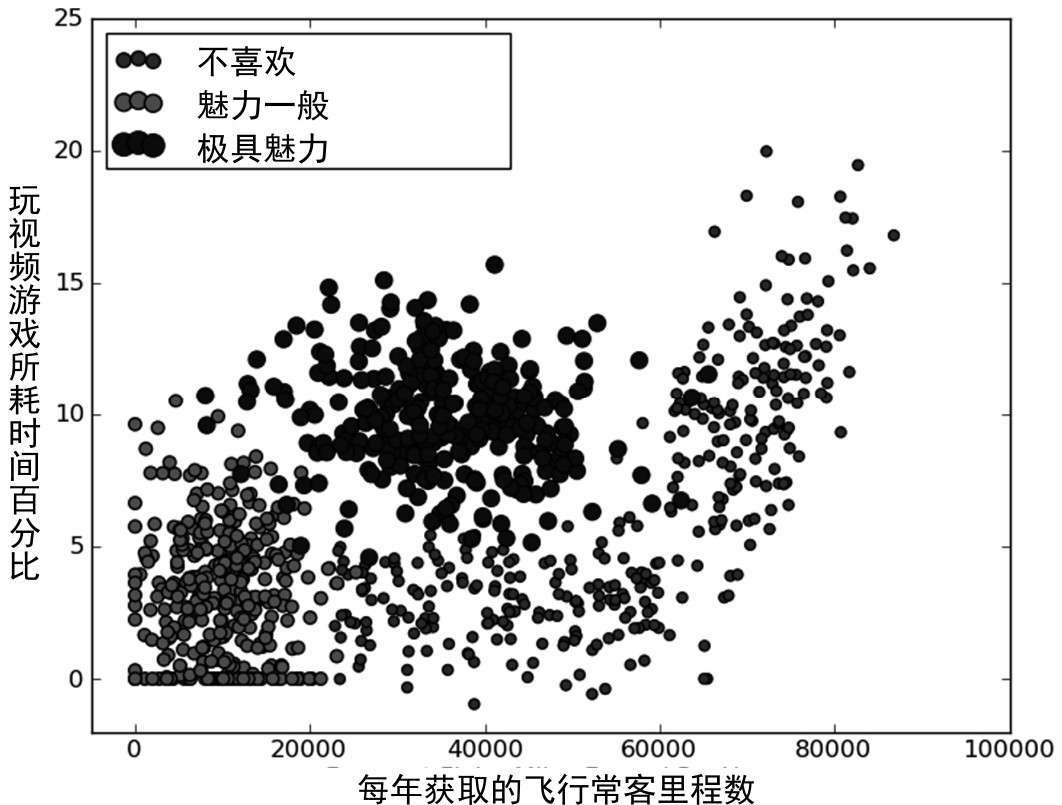

￼
图2-5 每年赢得的飞行常客里程数与玩视频游戏所占百分比的约会数据散点图。约会数据有三个特征，通过图中展示的两个特征更容易区分数据点从属的类别

#### 2.2.3 准备数据：归一化数值

表2-3给出了提取的四组数据，如果想要计算样本3和样本4之间的距离，可以使用下面的方法：

表2-3 约会网站原始数据改进之后的样本数据

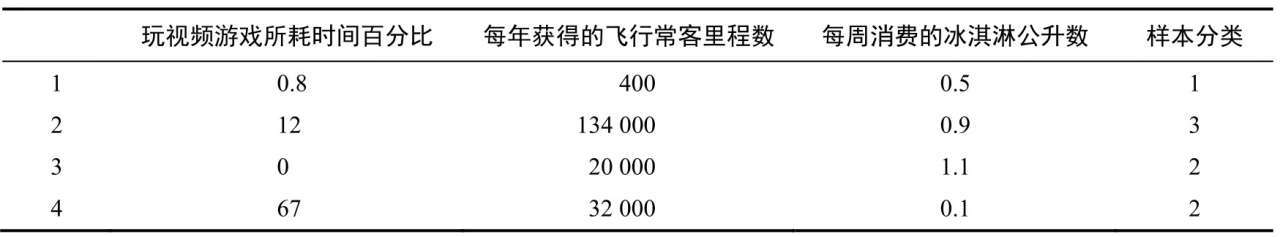

$\sqrt{(0-67)^2+(20000-32000)^2+(1.1-0.1)^2}$



我们很容易发现，上面方程中数字差值最大的属性对计算结果的影响最大，也就是说，每年获取的飞行常客里程数对于计算结果的影响将远远大于表2-3中其他两个特征——玩视频游戏所耗时间百分比和每周消费冰淇淋公升数——的影响。而产生这种现象的唯一原因，仅仅是因为飞行常客里程数远大于其他特征值。但海伦认为这三种特征是同等重要的，因此作为三个等权重的特征之一，飞行常客里程数并不应该如此严重地影响到计算结果。

在处理这种不同取值范围的特征值时，我们通常采用的方法是将数值归一化，如将取值范围处理为0到1或者-1到1之间。下面的公式可以将任意取值范围的特征值转化为0到1区间内的值：

$newValue = (oldvalue-min)/(max-min)$

￼
其中min和max分别是数据集中的最小特征值和最大特征值。虽然改变数值取值范围增加了分类器的复杂度，但为了得到准确结果，我们必须这样做。我们需要在文件kNN.py中增加一个新函数autoNorm()，该函数可以自动将数字特征值转化为0到1的区间。

程序清单2-3提供了函数autoNorm()的代码。

$$ 程序清单2-3 归一化特征值 $$


In [45]:

def autoNorm(dataSet):
    
    #将每列的最小值放在变量minVals中 ，dataSet.min(0)从列中选取最小值，而不是选取当前行的最小值    
    minVals = dataSet.min(0)
    #将每列的最大值放在变量maxVals中 
    maxVals = dataSet.max(0)
    
    """为了归一化特征值，我们必须使用丹铅值前去最小值，然后除以取值范围。需要注意的是，特征值矩阵由1000*3 个值，
    而minVals 和range的值都为1*3 。 为了解决这个问题，我们使用Numpy库中tile（）函数将变量内容复制成输入
    矩阵同样大小的矩阵，注意这是具体特征值相除1，而对于某些数值处理软件包，/可能意味着矩阵除法，但在Numpy库中，
    矩阵除法需要使用函数linalg.-solve(matA,matB)""" 
    
    ranges = maxVals-minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    
    normDataSet = dataSet - tile(minVals,(m,1))
    normDataSet = normDataSet/tile(ranges,(m,1))
    return normDataSet,ranges,minVals


执行autoNorm函数，检测函数的执行结果：

In [46]:
normMat,ranges,minVals = autoNorm(datingDataMat)

In [47]:
normMat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [48]:
ranges


array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

In [49]:
minVals

array([0.      , 0.      , 0.001156])

这里我们也可以只返回normMat矩阵，但是下一节我们将需要取值范围和最小值归一化测试数据。



#### 2.2.4 测试算法：作为完整程序验证分类器

上节我们已经将数据按照需求做了处理，本节我们将测试分类器的效果，如果分类器的正确率满足要求，海伦就可以使用这个软件来处理约会网站提供的约会名单了。机器学习算法一个很重要的工作就是评估算法的正确率，通常我们只提供已有数据的90%作为训练样本来训练分类器，而使用其余的10%数据去测试分类器，检测分类器的正确率。本书后续章节还会介绍一些高级方法完成同样的任务，这里我们还是采用最原始的做法。需要注意的是，10%的测试数据应该是随机选择的，由于海伦提供的数据并没有按照特定目的来排序，所以我们可以随意选择10%数据而不影响其随机性。
前面我们已经提到可以使用错误率来检测分类器的性能。对于分类器来说，错误率就是分类器给出错误结果的次数除以测试数据的总数，完美分类器的错误率为0，而错误率为1.0的分类器不会给出任何正确的分类结果。代码里我们定义一个计数器变量，每次分类器错误地分类数据，计数器就加1，程序执行完成之后计数器的结果除以数据点总数即是错误率。

为了测试分类器效果，创建函数datingClassTest,使用该函数测试分类器效果。

$$程序清单2-4 分类器针对约会网站的测试代码$$

In [50]:
def datingClassTest():
    hoRatio = 0.20
    datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')
    print ('-------',datingDataMat)
    normMat,ranges,minVals = autoNorm(datingDataMat)
    print('----normMat',normMat)
    m = normMat.shape[0]
    print('--m--',m)
    numTestVecs = int(m*hoRatio)
    print('--numTestVecs--',numTestVecs)
    errorCount = 0.0
    
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:], normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print("the classifier came back with: %d, the real answer is: %d" %(classifierResult,datingLabels[i]))
        if (classifierResult !=  datingLabels[i]): errorCount += 1.0 
    
    print("The total error rate is: %f" %(errorCount/float(numTestVecs)))

In [51]:
datingClassTest()

------- [[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6662700e-01]
 [4.8111000e+04 9.1345280e+00 7.2804500e-01]
 [4.3757000e+04 7.8826010e+00 1.3324460e+00]]
----normMat [[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]
--m-- 1000
--numTestVecs-- 200
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the

In [52]:
def classifyPerson():
    resultList = ['not at all','in small deses', 'in large doese']
    percentTats = float(input("percentage of tine spent playing video games?"))
    
    ffMiles = float(input("frequent flier miles earned per year?"))
    iceCream = float(input("liters of ice cream consumed per year?"))
    datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')
    mormMat,ranges,minVals = autoNorm(datingDataMat)
    inArr = array([ffMiles,percentTats,iceCream])
    classifierResult = classify0((inArr-minVals)/ranges,normMat,datingLabels,3)
    print ("You will probably like this person:",resultList[classifierResult -1])

In [53]:
classifyPerson()

percentage of tine spent playing video games?0.8
frequent flier miles earned per year?79999
liters of ice cream consumed per year?80
You will probably like this person: in large doese




目前为止，我们已经看到如何在数据上构建分类器。这里所有的数据让人看起来都很容易，但是如何在人不太容易看懂的数据上使用分类器呢？从下一节的例子中，我们会看到如何在二进制存储的图像数据上使用kNN。

### 2.3 示例：手写识别系统

本节我们一步步地构造使用k-近邻分类器的手写识别系统。为了简单起见，这里构造的系统只能识别数字0到9，参见图2-6。需要识别的数字已经使用图形处理软件，处理成具有相同的色彩和大小￼：宽高是32像素×32像素的黑白图像。尽管采用文本格式存储图像不能有效地利用内存空间，但是为了方便理解，我们还是将图像转换为文本格式。
￼
图2-6 手写数字数据集的例子

**示例：使用k-近邻算法的手写识别系统**
（1）收集数据：提供文本文件。
（2）准备数据：编写函数img2vector()，将图像格式转换为分类器使用的向量格式。
（3）分析数据：在Python命令提示符中检查数据，确保它符合要求。
（4）训练算法：此步骤不适用于k-近邻算法。
（5）测试算法：编写函数使用提供的部分数据集作为测试样本，测试样本与非测试样本的区别在于测试样本是已经完成分类的数据，如果预测分类与实际类别不同，则标记为一个错误。
（6）使用算法：本例没有完成此步骤，若你感兴趣可以构建完整的应用程序，从图像中提取数字，并完成数字识别，美国的邮件分拣系统就是一个实际运行的类似系统。



### 



#### 2.3.1 准备数据，将图像转换为测试向量



为了使用前面两个例子的分类器，我们必须将图像格式化处理为一个向量。我们将吧一个32\*32的二进制图像矩阵转换为1\* 1024的向量，这样前两节使用的分类器街可以处理数字图像信息了。

我们首先编写一段函数img2vector，将图像转换为向量：该函数创建1\*1024 的numpy数组，然后打开给定的文件，循环读出文件的前32行，并将每行的头32个字符值存储在Numpy数组中，最后返回数组。


In [112]:
import numpy

def img2vector(filename):
    returnVect = numpy.zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

在Python命令行中输入下列命令测试img2vector函数，


In [113]:
testVector = img2vector('testDigits/0_13.txt')

In [114]:
testVector[0,0:31]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [115]:
testVector[0,32:63]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### 2.3.2 测试算法：使用k-近邻算法识别手写数字

上节我们已经将数据处理成分类器可以识别的格式，本节我们将这些数据输入到分类器，检测分类器的执行效果。程序清单2-6所示的自包含函数handwritingClassTest()是测试分类器的代码

$$程序清单2-6 手写数字识别系统的测试代码$$

In [116]:
import os

def handwritingClassTest():
    hwLabels = []
    #获取目录内容 将trainingDigits目录中的文件内容存储在列表中
    trainingFileList = os.listdir('trainingDigits')
#   得到目录中有多少文件，并将其存储在列表中1，然后可以得到目录中由多少文件，并将其存储在变量m中  
    m = len(trainingFileList)
#   接着代码创建一个m行1024列的训练矩阵，该矩阵的每行数据存储一个图像。
    trainingMat = numpy.zeros((m,1024))
    for i in range(m):
        
        #从文件名解析分类数字。该目录下的文件按照规则命名，如文件9_45.txt 的分类是9，它是数字9 的第45个实例。
        #然后我们可以将类代码存在hwLabels 向量中，使用前面要论的img2vector函数载入图像。       
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector('trainingDigits/%s' %fileNameStr)
        
    #在下一步中，我们对testDigits目录中的文件执行相似的操作，不同之处是我们并不将这个目录下的文件载入矩阵中，而是使用classify0（）
    #函数测试该目录下的每个文件。由于文件中的值已经在0和1之间，本节并不需要使用2.2节的autoNorm（）函数。
    
    testFileList = os.listdir('testDigits')
    errorCount = 0.0
    mTest = len(testFileList)
    
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('.')[0])
        vectorUnderTest = img2vector('testDigits/%s' %fileNameStr)
        classifierResult = classify0(vectorUnderTest,trainingMat,hwLabels,3)
        print("The classifier came back with: %d, the real answer is: %d" %(classifierResult,classNumStr))
        if (classifierResult!= classNumStr): errorCount += 1.0
    print("\nthe total number of errors is: %d " % errorCount)
    print("\nthe total error rate is: %f" %(errorCount/float(mTest)))

在程序清单2-6中，将trainingDigits目录中的文件内容存储在列表中，然后可以得到目录中有多少文件，并将其存储在变量m中。接着，代码创建一个m行1024列的训练矩阵，该矩阵的每行数据存储一个图像。我们可以从文件名中解析出分类数字2。该目录下的文件按照规则命名，如文件9_45.txt的分类是9，它是数字9的第45个实例。然后我们可以将类代码存储在hwLabels向量中，使用前面讨论的img2vector函数载入图像。在下一步中，我们对testDigits目录中的文件执行相似的操作，不同之处是我们并不将这个目录下的文件载入矩阵中，而是使用classify0()函数测试该目录下的每个文件。由于文件中的值已经在0和1之间，本节并不需要使用2.2节的autoNorm()函数。

在Python命令提示符中输handwritingClassTest()，测试该函数的输出结果。依赖于机器速度，加载数据集可能需要花费很长时间，然后函数开始依次测试每个文件，输出结果如下所示：

In [117]:
handwritingClassTest()

The classifier came back with: 4, the real answer is: 436
The classifier came back with: 4, the real answer is: 422
The classifier came back with: 3, the real answer is: 317
The classifier came back with: 9, the real answer is: 976
The classifier came back with: 0, the real answer is: 52
The classifier came back with: 0, the real answer is: 46
The classifier came back with: 9, the real answer is: 962
The classifier came back with: 7, the real answer is: 767
The classifier came back with: 7, the real answer is: 773
The classifier came back with: 0, the real answer is: 85
The classifier came back with: 3, the real answer is: 39
The classifier came back with: 2, the real answer is: 257
The classifier came back with: 2, the real answer is: 243
The classifier came back with: 5, the real answer is: 562
The classifier came back with: 5, the real answer is: 576
The classifier came back with: 5, the real answer is: 589
The classifier came back with: 2, the real answer is: 280
The classifier cam

The classifier came back with: 2, the real answer is: 278
The classifier came back with: 0, the real answer is: 82
The classifier came back with: 9, the real answer is: 971
The classifier came back with: 0, the real answer is: 55
The classifier came back with: 0, the real answer is: 41
The classifier came back with: 9, the real answer is: 965
The classifier came back with: 7, the real answer is: 748
The classifier came back with: 7, the real answer is: 760
The classifier came back with: 0, the real answer is: 69
The classifier came back with: 9, the real answer is: 959
The classifier came back with: 7, the real answer is: 774
The classifier came back with: 4, the real answer is: 431
The classifier came back with: 3, the real answer is: 338
The classifier came back with: 4, the real answer is: 425
The classifier came back with: 3, the real answer is: 310
The classifier came back with: 4, the real answer is: 419
The classifier came back with: 3, the real answer is: 312
The classifier cam

The classifier came back with: 6, the real answer is: 684
The classifier came back with: 8, the real answer is: 881
The classifier came back with: 8, the real answer is: 880
The classifier came back with: 6, the real answer is: 685
The classifier came back with: 1, the real answer is: 167
The classifier came back with: 8, the real answer is: 843
The classifier came back with: 8, the real answer is: 857
The classifier came back with: 1, the real answer is: 173
The classifier came back with: 6, the real answer is: 652
The classifier came back with: 6, the real answer is: 646
The classifier came back with: 2, the real answer is: 28
The classifier came back with: 5, the real answer is: 517
The classifier came back with: 2, the real answer is: 236
The classifier came back with: 2, the real answer is: 222
The classifier came back with: 7, the real answer is: 712
The classifier came back with: 9, the real answer is: 917
The classifier came back with: 0, the real answer is: 33
The classifier c

The classifier came back with: 9, the real answer is: 934
The classifier came back with: 9, the real answer is: 920
The classifier came back with: 7, the real answer is: 725
The classifier came back with: 7, the real answer is: 731
The classifier came back with: 0, the real answer is: 38
The classifier came back with: 4, the real answer is: 45
The classifier came back with: 2, the real answer is: 215
The classifier came back with: 5, the real answer is: 520
The classifier came back with: 2, the real answer is: 229
The classifier came back with: 5, the real answer is: 534
The classifier came back with: 2, the real answer is: 23
The classifier came back with: 6, the real answer is: 671
The classifier came back with: 1, the real answer is: 178
The classifier came back with: 8, the real answer is: 848
The classifier came back with: 6, the real answer is: 665
The classifier came back with: 8, the real answer is: 860
The classifier came back with: 1, the real answer is: 144
The classifier ca

The classifier came back with: 8, the real answer is: 867
The classifier came back with: 1, the real answer is: 143
The classifier came back with: 1, the real answer is: 157
The classifier came back with: 8, the real answer is: 873
The classifier came back with: 2, the real answer is: 24
The classifier came back with: 2, the real answer is: 212
The classifier came back with: 5, the real answer is: 527
The classifier came back with: 5, the real answer is: 533
The classifier came back with: 4, the real answer is: 42
The classifier came back with: 0, the real answer is: 17
The classifier came back with: 9, the real answer is: 933
The classifier came back with: 9, the real answer is: 927
The classifier came back with: 7, the real answer is: 722
The classifier came back with: 7, the real answer is: 736
The classifier came back with: 6, the real answer is: 60
The classifier came back with: 4, the real answer is: 498
The classifier came back with: 4, the real answer is: 473
The classifier cam

The classifier came back with: 5, the real answer is: 5101
The classifier came back with: 4, the real answer is: 416
The classifier came back with: 5, the real answer is: 5103
The classifier came back with: 4, the real answer is: 414
The classifier came back with: 3, the real answer is: 335
The classifier came back with: 3, the real answer is: 321
The classifier came back with: 4, the real answer is: 428
The classifier came back with: 1, the real answer is: 11
The classifier came back with: 9, the real answer is: 940
The classifier came back with: 0, the real answer is: 64
The classifier came back with: 4, the real answer is: 4112
The classifier came back with: 4, the real answer is: 4106
The classifier came back with: 0, the real answer is: 70
The classifier came back with: 7, the real answer is: 779
The classifier came back with: 9, the real answer is: 954
The classifier came back with: 7, the real answer is: 751
The classifier came back with: 0, the real answer is: 58
The classifier

The classifier came back with: 3, the real answer is: 327
The classifier came back with: 3, the real answer is: 333
The classifier came back with: 4, the real answer is: 412
The classifier came back with: 5, the real answer is: 5105
The classifier came back with: 1, the real answer is: 17
The classifier came back with: 7, the real answer is: 743
The classifier came back with: 7, the real answer is: 757
The classifier came back with: 4, the real answer is: 4100
The classifier came back with: 0, the real answer is: 76
The classifier came back with: 9, the real answer is: 952
The classifier came back with: 9, the real answer is: 946
The classifier came back with: 0, the real answer is: 62
The classifier came back with: 7, the real answer is: 780
The classifier came back with: 7, the real answer is: 794
The classifier came back with: 9, the real answer is: 985
The classifier came back with: 3, the real answer is: 35
The classifier came back with: 5, the real answer is: 546
The classifier c

改变变量k的值、修改函数handwriting-ClassTest随机选取训练样本、改变训练样本的数目，都会对k-近邻算法的错误率产生影响，感兴趣的话可以改变这些变量值，观察错误率的变化。
实际使用这个算法时，算法的执行效率并不高。因为算法需要为每个测试向量做2000次距离计算，每个距离计算包括了1024个维度浮点运算，总计要执行900次，此外，我们还需要为测试向量准备2MB的存储空间。是否存在一种算法减少存储空间和计算时间的开销呢？k决策树就是k-近邻算法的优化版，可以节省大量的计算开销。

### 2.4 本章小结

k-近邻算法是分类数据最简单最有效的算法，本章通过两个例子讲述了如何使用k-近邻算法构造分类器。k-近邻算法是基于实例的学习，使用算法时我们必须有接近实际数据的训练样本数据。k-近邻算法必须保存全部数据集，如果训练数据集的很大，必须使用大量的存储空间。此外，由于必须对数据集中的每个数据计算距离值，实际使用时可能非常耗时。
k-近邻算法的另一个缺陷是它无法给出任何数据的基础结构信息，因此我们也无法知晓平均实例样本和典型实例样本具有什么特征。下一章我们将使用概率测量方法处理分类问题，该算法可以解决这个问题。